In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read CSV for crimes data

In [2]:
data = pd.read_csv('crimes.csv')
data['count'] = 1
data.drop(['category','gainingType','group','id','nerveUsed','nnb','status'], axis=1, inplace=True)

## Select Crimes of Interest

Just going to explore my drug crimes, I'll be checking transporting drugs and selling drugs seperately. The data isn't much, but it's still a nice exploration

### Transport Drug Crimes

In [3]:
transport_crimes = ['cocaine', 'amphetamines','cannabis']
transport_crimes_df = data[data.crime.isin(transport_crimes)]

In [4]:
transport_crimes_df

,crime,gainings,outcome,count
0,cocaine,764.0,success,1
1,cocaine,823.0,success,1
2,cocaine,862.0,success,1
3,cocaine,857.0,success,1
4,cocaine,815.0,success,1
...,...,...,...,...
806,cannabis,620.0,success,1
807,cannabis,NaN,jail,1
808,cannabis,673.0,success,1
809,cannabis,684.0,success,1


#### Crimes Dones

In [5]:
drug_group = transport_crimes_df.groupby('crime')
crimes_done = drug_group.count()['count']

drugs = [drug for drug, df in drug_group]

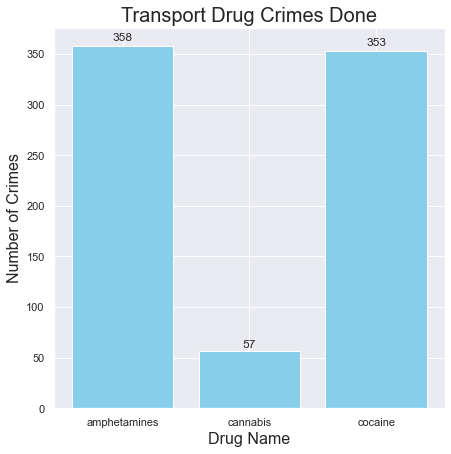

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
rx = ax.bar(drugs, crimes_done,color='SkyBlue')
ax.set_xlabel('Drug Name',fontsize=16)
ax.set_ylabel('Number of Crimes',fontsize=16)
ax.set_title('Transport Drug Crimes Done',fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rx)

plt.show()

([<matplotlib.patches.Wedge at 0x1f73c799c48>,
 [Text(0.11677113165067184, 1.0937844864565514, 'amphetamines'),
  Text(-1.0997699260152658, -0.02249688494829627, 'cannabis'),
  Text(0.13911647506020172, -1.0911675427572176, 'cocaine')],
 [Text(0.06369334453673009, 0.5966097198853916, '46.6%'),
  Text(-0.5998745050992359, -0.012271028153616146, '7.4%'),
  Text(0.07588171366920092, -0.5951822960493914, '46.0%')])

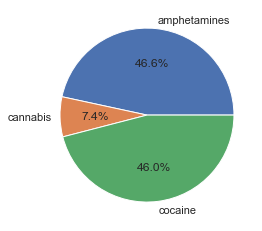

In [7]:
tr_crimes_done = list(crimes_done.values)
plt.pie(tr_crimes_done,labels=drugs,autopct='%1.1f%%')

Over the course of this experiment, transport amphetamines and cocaine have been the two most popular crimes performed, being attempted 358 and 353 times respectively. Cannabis has only been attempted 57 times and accounts for less than 8 percent of transport crimes performed.

#### Best Money Gains

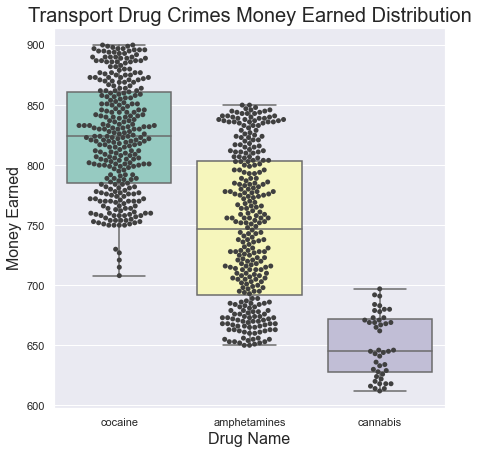

In [8]:
x = 'crime'
y = 'gainings'
colors = ['cyan','lightblue','lightgreen']
plt.figure(figsize = (7,7))
ax = sns.boxplot(x=x, y=y, data=transport_crimes_df, palette="Set3")
ax = sns.swarmplot(x=x, y=y, data=transport_crimes_df, color='.25')
plt.xlabel('Drug Name',fontsize=16)
plt.ylabel('Money Earned',fontsize=16)
plt.title('Transport Drug Crimes Money Earned Distribution',fontsize=20)
plt.show()

Transporting cocaine gives better financial returns than amphetamines and cannabis with majority of the deals resulting in a gain of USD 750 to USD 900 unlike cannabis which has the highest returns less than USD 700.

#### Crime Success Rate

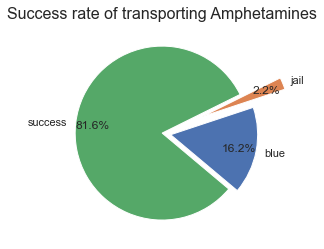

In [9]:
amphetamines_df = transport_crimes_df.loc[transport_crimes_df['crime'] == 'amphetamines'].reset_index()
drug_outcome_group = amphetamines_df.groupby(['outcome'])
crimes_outcome = drug_outcome_group.count()['count']
outcomes = [outcome for outcome, df in drug_outcome_group]
explode =(0.1,0.5,0)

amp_crimes_outcome = list(crimes_outcome.values)
plt.pie(amp_crimes_outcome,labels=outcomes,autopct='%1.1f%%',pctdistance=0.8,explode=explode,startangle=320)
plt.title('Success rate of transporting Amphetamines',fontsize=16)
plt.show()

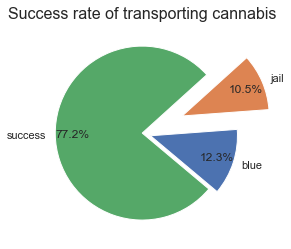

In [10]:
cannabis_df = transport_crimes_df.loc[transport_crimes_df['crime'] == 'cannabis'].reset_index()
drug_outcome_group = cannabis_df.groupby(['outcome'])
crimes_outcome = drug_outcome_group.count()['count']
outcomes = [outcome for outcome, df in drug_outcome_group]
explode =(0.1,0.5,0)
can_crimes_outcome = list(crimes_outcome.values)
plt.pie(can_crimes_outcome,labels=outcomes,autopct='%1.1f%%',pctdistance=0.8,explode=explode,startangle=320)
plt.title('Success rate of transporting cannabis', fontsize=16)
plt.show()

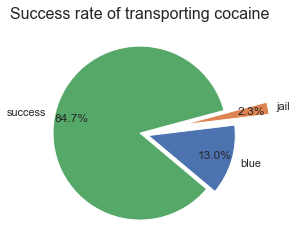

In [11]:
cocaine_df = transport_crimes_df.loc[transport_crimes_df['crime'] == 'cocaine'].reset_index()
drug_outcome_group = cocaine_df.groupby(['outcome'])
crimes_outcome = drug_outcome_group.count()['count']
outcomes = [outcome for outcome, df in drug_outcome_group]
explode =(0.1,0.5,0)
coc_crimes_outcome = list(crimes_outcome.values)
plt.pie(coc_crimes_outcome,labels=outcomes,autopct='%1.1f%%',pctdistance=0.8,explode=explode,startangle=320)
plt.title('Success rate of transporting cocaine', fontsize=16)
plt.show()

Looking at the success rate of each transport crimes venture;

Transporting cocaine has the best success rate followed closely by amphetamines which has the highest blue rate.

On the other hand, transporting cannabis has the highest fail rate with more than 10% of attempts resulting in jail time 

## Sell Drug Crimes

In [12]:
sell_crimes = ['drugspills', 'drugscocaine','drugscanabis']
sell_crimes_df = data[data.crime.isin(sell_crimes)]

In [13]:
sell_crimes_df

,crime,gainings,outcome,count
706,drugscocaine,NaN,blue,1
707,drugspills,NaN,blue,1
708,drugscanabis,640.0,success,1
709,drugscocaine,632.0,success,1
710,drugspills,488.0,success,1
711,drugscocaine,649.0,success,1
714,drugscocaine,NaN,blue,1
715,drugspills,514.0,success,1
716,drugscanabis,NaN,blue,1
720,drugscocaine,563.0,success,1


#### Sell drug crimes done

In [14]:
sell_drug_group = sell_crimes_df.groupby('crime')
sell_crimes_done = sell_drug_group.count()['count']

sell_drugs = [sell_drug for sell_drug, df in sell_drug_group]

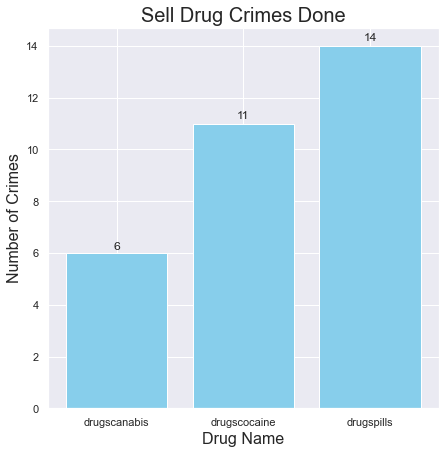

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
rx = ax.bar(sell_drugs, sell_crimes_done,color='SkyBlue')
ax.set_xlabel('Drug Name',fontsize=16)
ax.set_ylabel('Number of Crimes',fontsize=16)
ax.set_title('Sell Drug Crimes Done',fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rx)

plt.show()

I have attempted to sell cannabis 6 times, cocaine 11 times and pills 14 times

We'll explore how succesful these attempts were and the financial returns from each venture

#### Best Money Gains

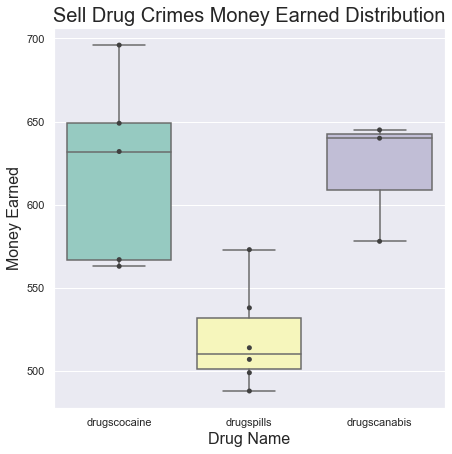

In [16]:
x = 'crime'
y = 'gainings'
colors = ['cyan','lightblue','lightgreen']
plt.figure(figsize = (7,7))
ax = sns.boxplot(x=x, y=y, data=sell_crimes_df, palette="Set3")
ax = sns.swarmplot(x=x, y=y, data=sell_crimes_df, color='.25')
plt.xlabel('Drug Name',fontsize=16)
plt.ylabel('Money Earned',fontsize=16)
plt.title('Sell Drug Crimes Money Earned Distribution',fontsize=20)
plt.show()

Selling cocaine has the best financial returns while selling pills has the worst so far.

#### success rate sell drugs

In [17]:
sell_crimes_df

,crime,gainings,outcome,count
706,drugscocaine,NaN,blue,1
707,drugspills,NaN,blue,1
708,drugscanabis,640.0,success,1
709,drugscocaine,632.0,success,1
710,drugspills,488.0,success,1
711,drugscocaine,649.0,success,1
714,drugscocaine,NaN,blue,1
715,drugspills,514.0,success,1
716,drugscanabis,NaN,blue,1
720,drugscocaine,563.0,success,1


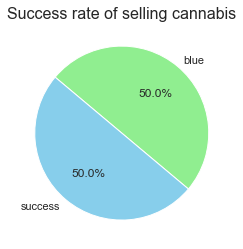

In [18]:
drugscanabis_df = sell_crimes_df.loc[sell_crimes_df['crime'] == 'drugscanabis'].reset_index()
drug_outcome_group = drugscanabis_df.groupby(['outcome'])
crimes_outcome = drug_outcome_group.count()['count']
outcomes = [outcome for outcome, df in drug_outcome_group]
colors = ['lightgreen','skyblue','lightgreen']

dcan_crimes_outcome = list(crimes_outcome.values)
plt.pie(dcan_crimes_outcome,labels=outcomes,autopct='%1.1f%%',colors=colors,startangle=320)
plt.title('Success rate of selling cannabis', fontsize=16)
plt.show()

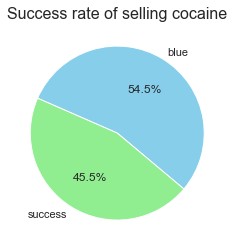

In [19]:
drugscocaine_df = sell_crimes_df.loc[sell_crimes_df['crime'] == 'drugscocaine'].reset_index()
drug_outcome_group = drugscocaine_df.groupby(['outcome'])
crimes_outcome = drug_outcome_group.count()['count']
outcomes = [outcome for outcome, df in drug_outcome_group]
#print(outcomes)
colors = ['skyblue','lightgreen']
dcoc_crimes_outcome = list(crimes_outcome.values)
plt.pie(dcoc_crimes_outcome,labels=outcomes,autopct='%1.1f%%',colors=colors,startangle=320)
plt.title('Success rate of selling cocaine', fontsize=16)
plt.show()

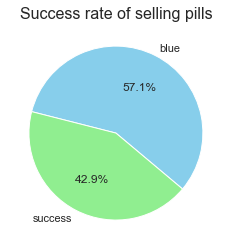

In [20]:
drugspills_df = sell_crimes_df.loc[sell_crimes_df['crime'] == 'drugspills'].reset_index()
drug_outcome_group = drugspills_df.groupby(['outcome'])
crimes_outcome = drug_outcome_group.count()['count']
outcomes = [outcome for outcome, df in drug_outcome_group]
colors = ['skyblue','lightgreen']

dpills_crimes_outcome = list(crimes_outcome.values)
plt.pie(dpills_crimes_outcome,labels=outcomes,autopct='%1.1f%%',colors=colors,startangle=320)
plt.title('Success rate of selling pills', fontsize=16)
plt.show()

Pretty much looks likes selling drugs are so far still safe (given the limited data) but with more blues than greens it's a bit counter productive when chasing merits

# The road so far

So far it looks like transporting cocaine is the best drug crime to attempt. Not only does it offer more money than all the others, it has the best success rate.

Selling drugs have a fewer sample size but are so far safe however they bring in cheaper returns and with a blue rate of at least 50 percent, seem counter intuitive to pursue for the drug crime merits

Interesting to note, transporting cocaine although having only 57 attemps, have a much higher failure rate than all drug crimes and a very low financial return when compared to the others. I will not be doing that one anytime soon.